In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [4]:
train.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [6]:
train.drop('id', axis=1, inplace=True)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

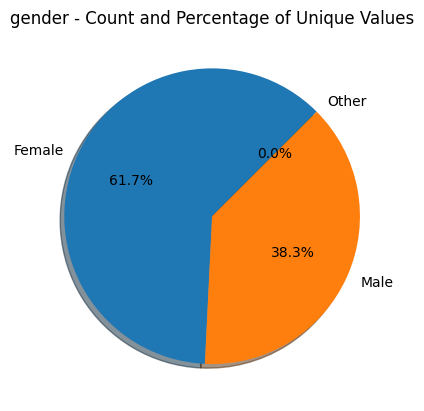

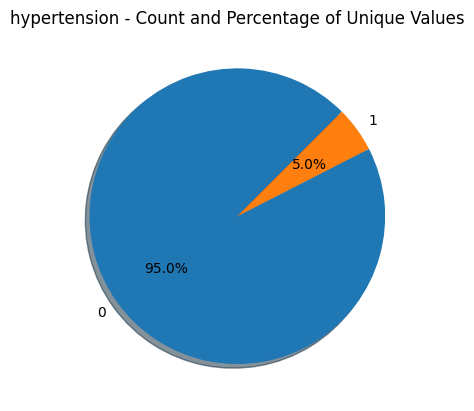

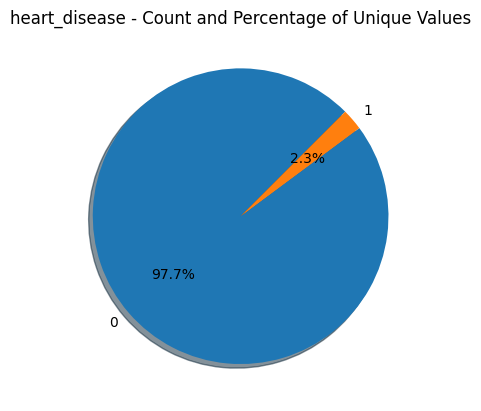

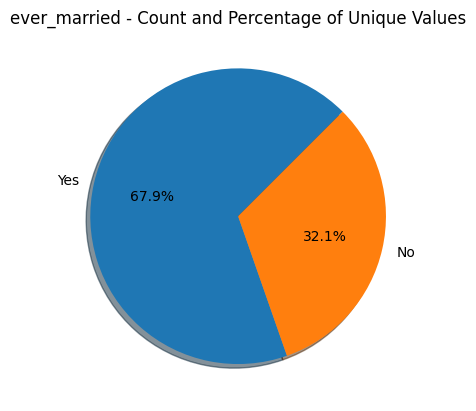

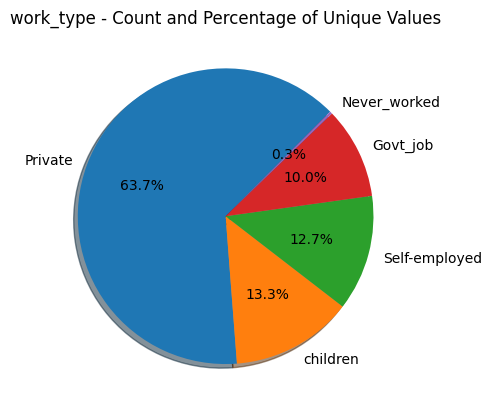

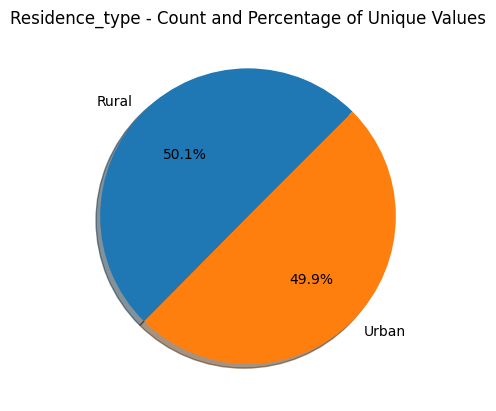

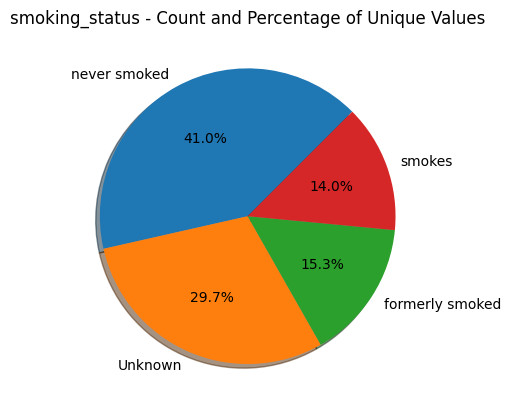

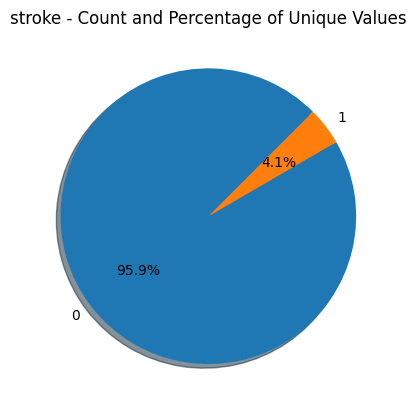

In [8]:
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

for feature in cat_features:
    count = train[feature].value_counts()
    percentage = count / train.shape[0] * 100
    plt.figure()
    plt.pie(percentage, labels=count.index, autopct='%1.1f%%', shadow=True, startangle=45)
    plt.title(f"{feature} - Count and Percentage of Unique Values")
    plt.show()

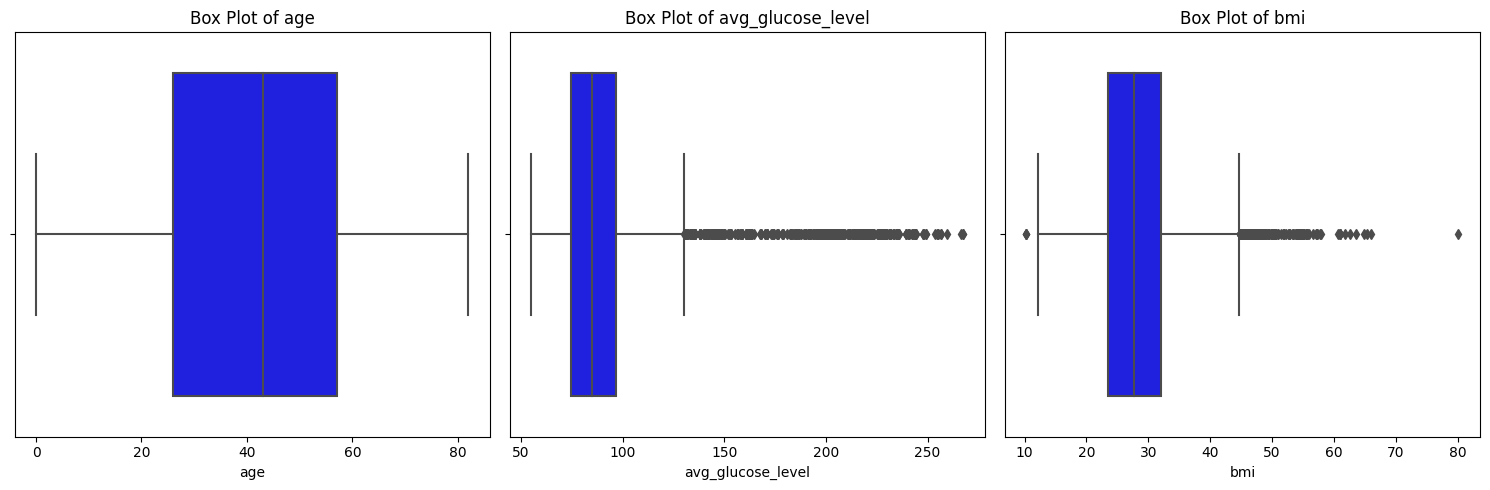

In [9]:
con_features = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(con_features):
    sns.boxplot(x=feature, data=train, color='blue', ax=ax[i])
    ax[i].set_title(f"Box Plot of {feature}")

plt.tight_layout()
plt.show()

In [10]:
train = pd.get_dummies(train, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,28.0,0,0,79.53,31.1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,33.0,0,0,78.44,23.9,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,42.0,0,0,103.00,40.3,0,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
3,56.0,0,0,64.87,28.8,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,24.0,0,0,73.36,28.8,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [11]:
train.shape

(15304, 22)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_standardized = scaler.fit_transform(train)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaling = scaler.fit_transform(train_standardized)
train_scaling = pd.DataFrame(train_scaling, columns=train.columns)

In [14]:
X = train_scaling.drop(['stroke'], axis=1)
y = train['stroke']

In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15299    0
15300    0
15301    0
15302    0
15303    0
Name: stroke, Length: 15304, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
scores1 = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores1.mean(), scores1.std()))

Accuracy: 0.93 (+/- 0.01)


In [26]:
y_pred1 = clf.predict(X_test)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)
print("RMSE: ", rmse1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print(metrics.classification_report(y_test, y_pred1))

RMSE:  0.26930525157032936
Accuracy: 0.9274746814766416
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2931
           1       0.19      0.22      0.20       130

    accuracy                           0.93      3061
   macro avg       0.58      0.59      0.58      3061
weighted avg       0.93      0.93      0.93      3061



In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
kfold = KFold(n_splits=5, shuffle=True)
scores2 = cross_val_score(rf, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std()))

Accuracy: 0.96 (+/- 0.00)


In [21]:
y_pred2 = rf.predict(X_test)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)
print("RMSE: ", rmse2)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(metrics.classification_report(y_test, y_pred2))

RMSE:  0.2092284483840529
Accuracy: 0.9562234563868017
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.40      0.06      0.11       130

    accuracy                           0.96      3061
   macro avg       0.68      0.53      0.54      3061
weighted avg       0.94      0.96      0.94      3061



In [22]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
kfold = KFold(n_splits=5, shuffle=True)
scores3 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores3.mean(), scores3.std()))

Accuracy: 0.96 (+/- 0.00)


In [23]:
y_pred3 = model.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
print("RMSE: ", rmse3)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print(metrics.classification_report(y_test, y_pred3))

RMSE:  0.21309621473196974
Accuracy: 0.9545900032669062
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2931
           1       0.36      0.09      0.15       130

    accuracy                           0.95      3061
   macro avg       0.66      0.54      0.56      3061
weighted avg       0.94      0.95      0.94      3061

